**API bilan ishlash**

In [2]:
import requests

In [8]:
url = "https://api.exchangerate-api.com/v4/latest/USD"
response = requests.get(url)
response.json()['rates']['UZS']

12699.32

Nazariy:
GET: ma’lumot olish

POST: ma’lumot yuborish

PUT, DELETE: tahrirlash va o‘chirish

In [15]:
# get so'rovi
response = requests.get("https://api.exchangerate-api.com/v4/latest/USD")
print(response.status_code)  # 200 => muvaffaqiyatli


200


| Xatolik kodi | Ma’nosi             | Sababi                         |
| ------------ | ------------------- | ------------------------------ |
| 200          | OK                  | Hammasi yaxshi                 |
| 400          | Bad Request         | Noto‘g‘ri so‘rov               |
| 401          | Unauthorized        | API kaliti noto‘g‘ri yoki yo‘q |
| 404          | Not Found           | URL xato                       |
| 500          | Internal Server Err | Serverda muammo                |


In [22]:
url = "https://api.openweathermap.org/data/2.5/weather"
response = requests.get(url)
if response.status_code != 200:
    print("Xatolik:", response.status_code)

Xatolik: 401


**Real-Time Kripto Narxlari Dashboard**

json ni yuklab olish

In [46]:
import requests
url = "https://api.coingecko.com/api/v3/simple/price"
params = {
    "ids":"bitcoin,ethereum,dogecoin",
    "vs_currencies":"usd"
}
response = requests.get(url, params=params)
data = response.json()
print(data)

{'bitcoin': {'usd': 117984}, 'dogecoin': {'usd': 0.281041}, 'ethereum': {'usd': 3785.85}}


dataframe ga o'tkazish

In [55]:
import pandas as pd

df = pd.DataFrame(data).T # Transpose qilindi
df.columns = ['price_usd']
df['crypto'] = df.index
df.reset_index(drop=True, inplace=True)
df

,price_usd,crypto
0,117984.000000,bitcoin
1,0.281041,dogecoin
2,3785.850000,ethereum


real vaqtli kuzatish (masalan, 20 soniyada 1 martta)

In [56]:
import time
for i in range(5): # 5 marta yangilaydi
  response = requests.get(url, params=params)
  data = response.json()
  df = pd.DataFrame(data).T
  df.columns = ['price_usd']
  df['crypto'] = df.index
  df.reset_index(drop=True, inplace=True)
  print(f"\nYangilangan: {time.ctime()}")
  print(df)

  time.sleep(20) # 10 soniya kutish


Yangilangan: Mon Jul 21 18:34:26 2025
       price_usd    crypto
0  117937.000000   bitcoin
1       0.277411  dogecoin
2    3785.890000  ethereum

Yangilangan: Mon Jul 21 18:34:46 2025
       price_usd    crypto
0  117937.000000   bitcoin
1       0.277411  dogecoin
2    3785.890000  ethereum

Yangilangan: Mon Jul 21 18:35:06 2025
       price_usd    crypto
0  117937.000000   bitcoin
1       0.277411  dogecoin
2    3785.890000  ethereum

Yangilangan: Mon Jul 21 18:35:26 2025
       price_usd    crypto
0  117918.000000   bitcoin
1       0.277105  dogecoin
2    3785.410000  ethereum

Yangilangan: Mon Jul 21 18:35:46 2025
       price_usd    crypto
0  117918.000000   bitcoin
1       0.277105  dogecoin
2    3785.410000  ethereum


Narx o'zgarishlari tahlili

In [58]:
hist_data = []

for i in range(5):
  response = requests.get(url, params=params)
  prices = response.json()
  prices['timestamp'] = time.time()
  hist_data.append(prices)
  time.sleep(20)

records = []
for record in hist_data:
  ts = record['timestamp']
  for coin in ['bitcoin','ethereum','dogecoin']:
    records.append({
        'crypto':coin,
        'price_usd':record[coin]['usd'],
        'timestamp':ts
    })

df = pd.DataFrame(records)
df['time'] = pd.to_datetime(df['timestamp'], unit='s')

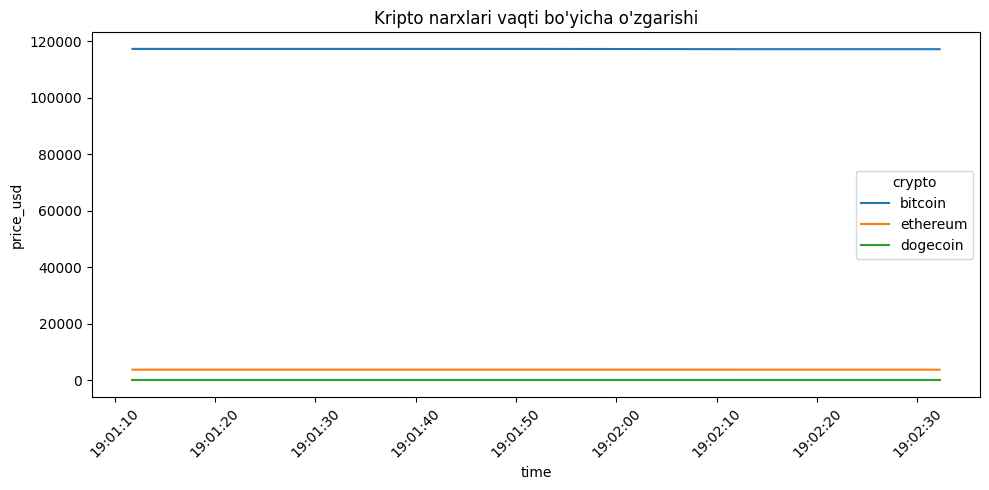

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='time', y='price_usd', hue='crypto')
plt.title("Kripto narxlari vaqti bo'yicha o'zgarishi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

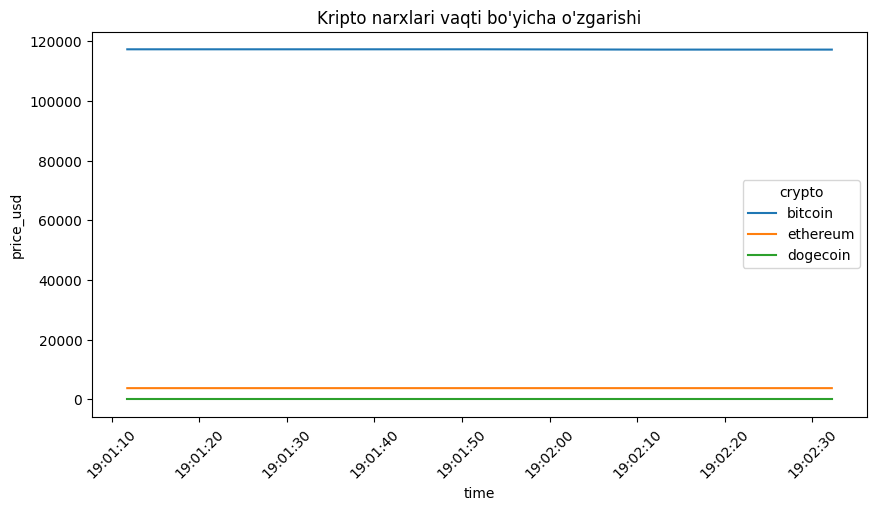

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='time', y='price_usd', hue='crypto')
plt.title("Kripto narxlari vaqti bo'yicha o'zgarishi")
plt.xticks(rotation=45)
plt.show()

In [73]:
summary = df.groupby('crypto')['price_usd'].describe()
summary

,count,mean,std,min,25%,50%,75%,max
crypto,,,,,,,,
bitcoin,5.0,117323.400000,54.224533,117264.0000,117264.0000,117363.000000,117363.000000,117363.000000
dogecoin,5.0,0.275162,0.000057,0.2751,0.2751,0.275204,0.275204,0.275204
ethereum,5.0,3744.372000,0.887311,3743.4000,3743.4000,3745.020000,3745.020000,3745.020000


Xulosa

Vaqt oralig'i kam bo'lgani uchun o'zgarishlarni ko'ra olmadik, vaqt oralig'ini soat yoki sutkalarda kiritsak o'zgarishlarni yaqqol ko'rishimiz mumkin